In [1]:
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt

In [2]:
path = r'Resources'
irs_files = glob.glob(os.path.join(path, "IRS*.csv"))

data = [pd.read_csv(filename) for filename in irs_files]

for dataframe, filename in zip(data, irs_files):
    dataframe['file_name'] = filename

irs_data_2014_to_2018_df = pd.concat(data, ignore_index=True)
irs_data_2014_to_2018_df

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,...,N19700,A19700,file_name,RAL,N03230,A03230,N03240,A03240,N19550,A19550
0,1,AL,0,0,2036290,853350,746450,393790,1851240.0,93480.0,...,155480,2380707,Resources\IRS_Abridged_Data_by_ZipCode_2014.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AL,35004,0,5200,2150,2100,820,4730.0,260.0,...,350,4361,Resources\IRS_Abridged_Data_by_ZipCode_2014.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,AL,35005,0,3190,1410,840,890,2880.0,160.0,...,230,1822,Resources\IRS_Abridged_Data_by_ZipCode_2014.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,AL,35006,0,1240,490,590,140,1120.0,40.0,...,40,265,Resources\IRS_Abridged_Data_by_ZipCode_2014.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,AL,35007,0,12050,4840,5180,1740,10580.0,840.0,...,1030,11347,Resources\IRS_Abridged_Data_by_ZipCode_2014.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140828,56,WY,83126,0,200,70,130,0,190.0,0.0,...,0,0,Resources\IRS_Abridged_Data_by_ZipCode_2018.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140829,56,WY,83127,0,1620,550,930,100,1410.0,110.0,...,170,2157,Resources\IRS_Abridged_Data_by_ZipCode_2018.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140830,56,WY,83128,0,950,440,450,60,840.0,50.0,...,60,1305,Resources\IRS_Abridged_Data_by_ZipCode_2018.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140831,56,WY,83414,0,230,100,120,0,200.0,0.0,...,50,1073,Resources\IRS_Abridged_Data_by_ZipCode_2018.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
irs_data_2014_to_2018_df.columns.values

array(['STATEFIPS', 'STATE', 'ZIPCODE', 'AGI_STUB', 'N1', 'MARS1',
       'MARS2', 'MARS4', 'ELF', 'CPREP', 'PREP', 'DIR_DEP', 'N2',
       'NUMDEP', 'TOTAL_VITA', 'VITA', 'TCE', 'VITA_EIC', 'RAC',
       'ELDERLY', 'A00100', 'N02650', 'A02650', 'N00200', 'A00200',
       'N02900', 'A02900', 'N03220', 'A03220', 'N03300', 'A03300',
       'N03270', 'A03270', 'N03150', 'A03150', 'N03210', 'A03210',
       'N04450', 'A04450', 'N04100', 'A04100', 'N04200', 'A04200',
       'N04470', 'A04470', 'A00101', 'N17000', 'A17000', 'N18425',
       'A18425', 'N18450', 'A18450', 'N18500', 'A18500', 'N18800',
       'A18800', 'N18460', 'A18460', 'N18300', 'A18300', 'N19300',
       'A19300', 'N19500', 'A19500', 'N19530', 'A19530', 'N19570',
       'A19570', 'N19700', 'A19700', 'file_name', 'RAL', 'N03230',
       'A03230', 'N03240', 'A03240', 'N19550', 'A19550'], dtype=object)

In [4]:
new_data = irs_data_2014_to_2018_df[["STATEFIPS","STATE","ZIPCODE","A18500"]]
#new_data.set_index("ZIPCODE",inplace=True)
new_data.head()

,STATEFIPS,STATE,ZIPCODE,A18500
0,1,AL,0,337110
1,1,AL,35004,303
2,1,AL,35005,211
3,1,AL,35006,24
4,1,AL,35007,1370


In [5]:
zip_to_county = pd.read_csv("resources/ZIP-COUNTY-FIPS_2017-06.csv")
#zip_to_county.set_index("ZIP",inplace=True)
zip_to_county.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


In [6]:
new_data = new_data.merge(zip_to_county,left_on='ZIPCODE',right_on='ZIP',how='inner')

In [7]:
new_data.head()

,STATEFIPS,STATE_x,ZIPCODE,A18500,ZIP,COUNTYNAME,STATE_y,STCOUNTYFP,CLASSFP
0,1,AL,35004,303,35004,St. Clair County,AL,1115,H1
1,1,AL,35004,1009,35004,St. Clair County,AL,1115,H1
2,1,AL,35004,1042,35004,St. Clair County,AL,1115,H1
3,1,AL,35004,1139,35004,St. Clair County,AL,1115,H1
4,1,AL,35004,303,35004,St. Clair County,AL,1115,H1


In [8]:
tax_by_county = new_data.groupby(['COUNTYNAME'])['A18500'].mean()
tax_by_county.head()

COUNTYNAME
Abbeville County      937.466667
Acadia Parish         299.343284
Accomack County       191.257143
Ada County          10731.858824
Adair County          379.371585
Name: A18500, dtype: float64

In [9]:
f_names = str(irs_data_2014_to_2018_df['file_name'].to_list())
irs_data_2014_to_2018_df['year'] = re.findall(r'\d+', f_names)
irs_data_2014_to_2018_df['year']

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
140828    2018
140829    2018
140830    2018
140831    2018
140832    2018
Name: year, Length: 140833, dtype: object

In [10]:
irs_data_2014_to_2018_df[['year','ZIPCODE','A00200']].sort_values('year',axis=0)

,year,ZIPCODE,A00200
0,2014,0,86880345
18445,2014,43026,1916714
18444,2014,43025,129735
18443,2014,43023,465834
18442,2014,43022,50090
...,...,...,...
122388,2018,41774,26993
122387,2018,41773,12914
122386,2018,41764,4863
122397,2018,41825,4201


In [11]:
data = 'Resources/County_to_County_Migration_2014-2018.csv'

county_to_county_df = pd.read_csv(data)
county_to_county_df.head()

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A,"County, State - A","County, State - B",Flow B to A
0,1,1,1,3.0,Alabama,Autauga County,Alabama,Baldwin County,34,"Autauga County, Alabama","Baldwin County, Alabama",34
1,1,1,1,5.0,Alabama,Autauga County,Alabama,Barbour County,4,"Autauga County, Alabama","Barbour County, Alabama",4
2,1,1,1,7.0,Alabama,Autauga County,Alabama,Bibb County,14,"Autauga County, Alabama","Bibb County, Alabama",14
3,1,1,1,9.0,Alabama,Autauga County,Alabama,Blount County,3,"Autauga County, Alabama","Blount County, Alabama",3
4,1,1,1,15.0,Alabama,Autauga County,Alabama,Calhoun County,2,"Autauga County, Alabama","Calhoun County, Alabama",2


In [12]:
data = 'output/flow.clean14-18.csv'

flow_clean_2014_to_2018_df = pd.read_csv(data)
flow_clean_2014_to_2018_df.head()

,state_from,county_from,state_to,county_to,in,out,change
0,1,1,1,3,0,90,-90
1,1,1,1,21,203,278,-75
2,1,1,1,47,212,89,123
3,1,1,1,51,1426,1388,38
4,1,1,1,73,106,129,-23


In [13]:
data = 'output/total.clean14-18.csv'

total_clean_2014_to_2018_df = pd.read_csv(data)
total_clean_2014_to_2018_df.head()

,state,county,pop
0,1,1,59036
1,1,3,232141
2,1,5,22593
3,1,7,20059
4,1,9,58584


In [14]:
data = 'Resources/zip_code_database.csv'

zip_code_df = pd.read_csv(data)
zip_code_df.head()

,Unnamed: 0,zip,state,county,State Name,"County, State"
0,0,99553,AK,Aleutians East Borough,Alaska,"Aleutians East Borough, Alaska"
1,1,99571,AK,Aleutians East Borough,Alaska,"Aleutians East Borough, Alaska"
2,2,99583,AK,Aleutians East Borough,Alaska,"Aleutians East Borough, Alaska"
3,3,99612,AK,Aleutians East Borough,Alaska,"Aleutians East Borough, Alaska"
4,4,99661,AK,Aleutians East Borough,Alaska,"Aleutians East Borough, Alaska"


In [15]:
exit_by_county = county_to_county_df.groupby('County Name of Geography B')['Flow B to A'].sum()
exit_by_county

County Name of Geography B
-                            1987973
Abbeville County                1507
Acadia Parish                   3276
Accomack County                 2198
Ada County                     24172
                              ...   
Yukon-Koyukuk Census Area        558
Yuma County                    11281
Zapata County                    359
Zavala County                    621
Ziebach County                   278
Name: Flow B to A, Length: 1954, dtype: int64

In [16]:
entrance_by_county = county_to_county_df.groupby('County Name of Geography A')['Flow B to A'].sum()
entrance_by_county

County Name of Geography A
Abbeville County              1554
Acadia Parish                 2666
Accomack County               1038
Ada County                   30663
Adair County                  6402
                             ...  
Yukon-Koyukuk Census Area      362
Yuma County                  15735
Zapata County                  776
Zavala County                  603
Ziebach County                  31
Name: Flow B to A, Length: 1875, dtype: int64

In [17]:
migration_df = pd.DataFrame({'Exit':exit_by_county,'Enter':entrance_by_county})
migration_df["Ratio"] = migration_df["Exit"]/migration_df["Enter"]
migration_df

,Exit,Enter,Ratio
-,1987973,NaN,NaN
Abbeville County,1507,1554.0,0.969755
Acadia Parish,3276,2666.0,1.228807
Accomack County,2198,1038.0,2.117534
Ada County,24172,30663.0,0.788312
...,...,...,...
Yukon-Koyukuk Census Area,558,362.0,1.541436
Yuma County,11281,15735.0,0.716937
Zapata County,359,776.0,0.462629
Zavala County,621,603.0,1.029851


In [18]:
migration_df = migration_df.join(tax_by_county)
migration_df = migration_df[migration_df["A18500"] > 0]
migration_df = migration_df[migration_df["Ratio"] < 2]
migration_df

,Exit,Enter,Ratio,A18500
Abbeville County,1507,1554.0,0.969755,937.466667
Acadia Parish,3276,2666.0,1.228807,299.343284
Ada County,24172,30663.0,0.788312,10731.858824
Adair County,6956,6402.0,1.086535,379.371585
Adams County,63172,56263.0,1.122798,2573.572539
...,...,...,...,...
Young County,957,691.0,1.384949,889.033333
Yuba County,5772,7362.0,0.784026,1578.708333
Yuma County,11281,15735.0,0.716937,1431.929577
Zapata County,359,776.0,0.462629,465.650000


In [19]:
min(migration_df['A18500'])

3.6

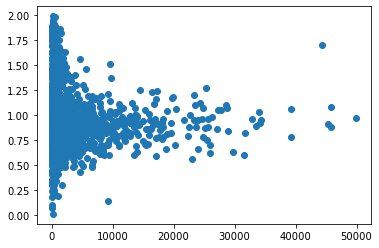

In [20]:
plt.scatter(migration_df["A18500"],migration_df["Ratio"])

#### Columns needed for Tableau
year, state_from, county_from, state_to, county_to, starting_population, in, out, change, cost_of_living_index,



In [21]:
migration_df.to_csv(r'output/migration_data.csv', index=False)